# Project 01 - Write a Data Science Blog Post

## Part 2: Data Analysis

### Data
 - NBA 2018-2019 Player Box Scores 
 - NBA 2018-2019 Daily Fantasy Scores (DFS)
 
### Business Questions
1. What are the key drivers for top fantasy scores?
2. What effect, if any, does seasonality play during the NBA season? 
3. Which positions are the most valuable from a fantasy score perspective? 

### Import Packages

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

# Use FiveThirtyEight's style of graphs
style.use('fivethirtyeight')

# Use 4 decimal places in output display
pd.set_option("display.precision", 2)

In [2]:
os.chdir('../lib')

In [3]:
from helpers import min_games_filter

### Import Data

In [4]:
os.chdir('../data')

In [5]:
df = pd.read_csv("Cleaned_NBA1819_PlayerStats-DFS.csv")

# Dropping unncessary columns
del_cols = ['Unnamed: 0', 'MIN']

df.drop(del_cols, axis=1, inplace=True)
df.head()

,DATASET,GAME-ID,DATE,PLAYER-ID,PLAYER,OWNTEAM,OPPONENTTEAM,STARTER (Y/N),VENUE (R/H),MINUTES,...,A,PF,ST,TO,BL,PTS,POSITION,DRAFTKINGS_CLASSIC_SALARY,FANDUEL_FULLROSTER_SALARY,YAHOO_FULLSLATE_SALARY
0,NBA 2018-2019 Regular Season,21800001,2018-10-16,203967,Dario Saric,Philadelphia,Boston,Y,R,22.90,...,1,5,0,3,0,6,PF,5500.0,6400.0,25.0
1,NBA 2018-2019 Regular Season,21800001,2018-10-16,203496,Robert Covington,Philadelphia,Boston,Y,R,34.22,...,0,1,2,2,1,8,SF,4700.0,6500.0,23.0
2,NBA 2018-2019 Regular Season,21800001,2018-10-16,203954,Joel Embiid,Philadelphia,Boston,Y,R,36.82,...,2,3,1,5,2,23,C,8800.0,10400.0,41.0
3,NBA 2018-2019 Regular Season,21800001,2018-10-16,1628365,Markelle Fultz,Philadelphia,Boston,Y,R,24.33,...,2,1,1,3,0,5,PG,5000.0,5700.0,16.0
4,NBA 2018-2019 Regular Season,21800001,2018-10-16,1627732,Ben Simmons,Philadelphia,Boston,Y,R,42.73,...,8,5,4,3,2,19,PG,8400.0,10000.0,46.0


In [6]:
df.shape

(27855, 34)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27855 entries, 0 to 27854
Data columns (total 34 columns):
DATASET                      27855 non-null object
GAME-ID                      27855 non-null int64
DATE                         27855 non-null object
PLAYER-ID                    27855 non-null int64
PLAYER                       27855 non-null object
OWNTEAM                      27855 non-null object
OPPONENTTEAM                 27855 non-null object
STARTER (Y/N)                27855 non-null object
VENUE (R/H)                  27855 non-null object
MINUTES                      27855 non-null float64
USAGE RATE                   27855 non-null float64
DAYSREST                     27855 non-null int64
DRAFTKINGS_FANTASYPOINTS     27855 non-null float64
FANDUEL_FANTASYPOINTS        27855 non-null float64
YAHOO_FANTASYPOINTS          27855 non-null float64
FG                           27855 non-null int64
FGA                          27855 non-null int64
3P                      

### Data Cleaning

In [8]:
# Add additional date columns for analysis
df['DATE'] = pd.to_datetime(df['DATE'])
df['DATE_Month'] = pd.DatetimeIndex(df['DATE']).month_name()

# Re-order the Months based on the NBA season
df['DATE_Month'] = df['DATE_Month'].replace({'October':'NBA1819-01_October',
                                             'November':'NBA1819-02_November',
                                             'December':'NBA1819-03_December',
                                             'January':'NBA1819-04_January',
                                             'February':'NBA1819-05_February',
                                             'March':'NBA1819-06_March',
                                             'April':'NBA1819-07_April',
                                             'May':'NBA1819-08_May',
                                             'June':'NBA1819-09_June'})

In [9]:
# Institute a minimum games played to reduce noise
test_df = min_games_filter(df, games_played=40)

# Create a filter to look at just starters
starter_mask = (test_df['STARTER (Y/N)'] == 'Y')

In [10]:
test_df.shape

(24758, 35)

In [11]:
F_players = (df['POSITION'] == 'F')
df[F_players].PLAYER.unique()

array(['Haywood Highsmith', 'Mitchell Creek', 'Bruno Caboclo',
       'James Ennis III', 'Markieff Morris', 'Jemerrio Jones',
       'Torrey Craig', 'Paul Millsap', 'Jarred Vanderbilt',
       'Juancho Hernangomez', 'Trey Lyles', 'Rudy Gay',
       'Dante Cunningham', 'Quincy Pondexter', 'Kevin Durant',
       'Draymond Green', 'Alfonzo McKinnie', 'Jonas Jerebko',
       'Jordan Bell', 'Danilo Gallinari', 'JaMychal Green',
       'Kawhi Leonard', 'Pascal Siakam', 'Khris Middleton',
       'Giannis Antetokounmpo', 'Nikola Mirotic', 'Ersan Ilyasova',
       'Malcolm Miller'], dtype=object)

### Exploratory Data Analysis

In [12]:
# Seasonality for positions and their respective average fantasy score values
pd.pivot_table(test_df[starter_mask], index=['POSITION'],
                                      values=['YAHOO_FANTASYPOINTS'], 
                                      columns=['DATE_Month'], 
                                      aggfunc='mean') #.plot(figsize=(12,8), kind='line')

YAHOO_FANTASYPOINTS                                          \
DATE_Month  NBA1819-01_October NBA1819-02_November NBA1819-03_December   
POSITION                                                                 
C                        34.24               34.01               33.97   
F                          NaN                 NaN                 NaN   
F-C                        NaN                 NaN                 NaN   
G                          NaN                 NaN                 NaN   
G-F                        NaN                 NaN                 NaN   
PF                       28.94               27.72               28.86   
PG                       31.07               31.09               30.60   
SF                       26.54               25.78               27.71   
SG                       27.28               27.55               27.28   

                                                                    \
DATE_Month NBA1819-04_January NBA1819-05_February NBA1819-06_March   
POSITION                                                             
C                       34.20               33.41            33.26   
F                         NaN                 NaN              NaN   
F-C                       NaN                 NaN              NaN   
G                         NaN                 NaN              NaN   
G-F                       NaN                 NaN              NaN   
PF                      28.44               28.96            27.57   
PG                      31.54               33.70            33.27   
SF                      26.74               28.94            25.98   
SG                      27.75               28.32            28.75   

                                                            
DATE_Month NBA1819-07_April NBA1819-08_May NBA1819-09_June  
POSITION                                                    
C                     31.65          32.36           23.58  
F                     37.35          39.73           42.22  
F-C                   48.50            NaN           20.60  
G                     27.73          31.13           39.47  
G-F                     NaN          15.67           21.25  
PF                    29.04          34.29             NaN  
PG                    33.20          36.07             NaN  
SF                    27.32          33.01             NaN  
SG                    25.34          30.55             NaN

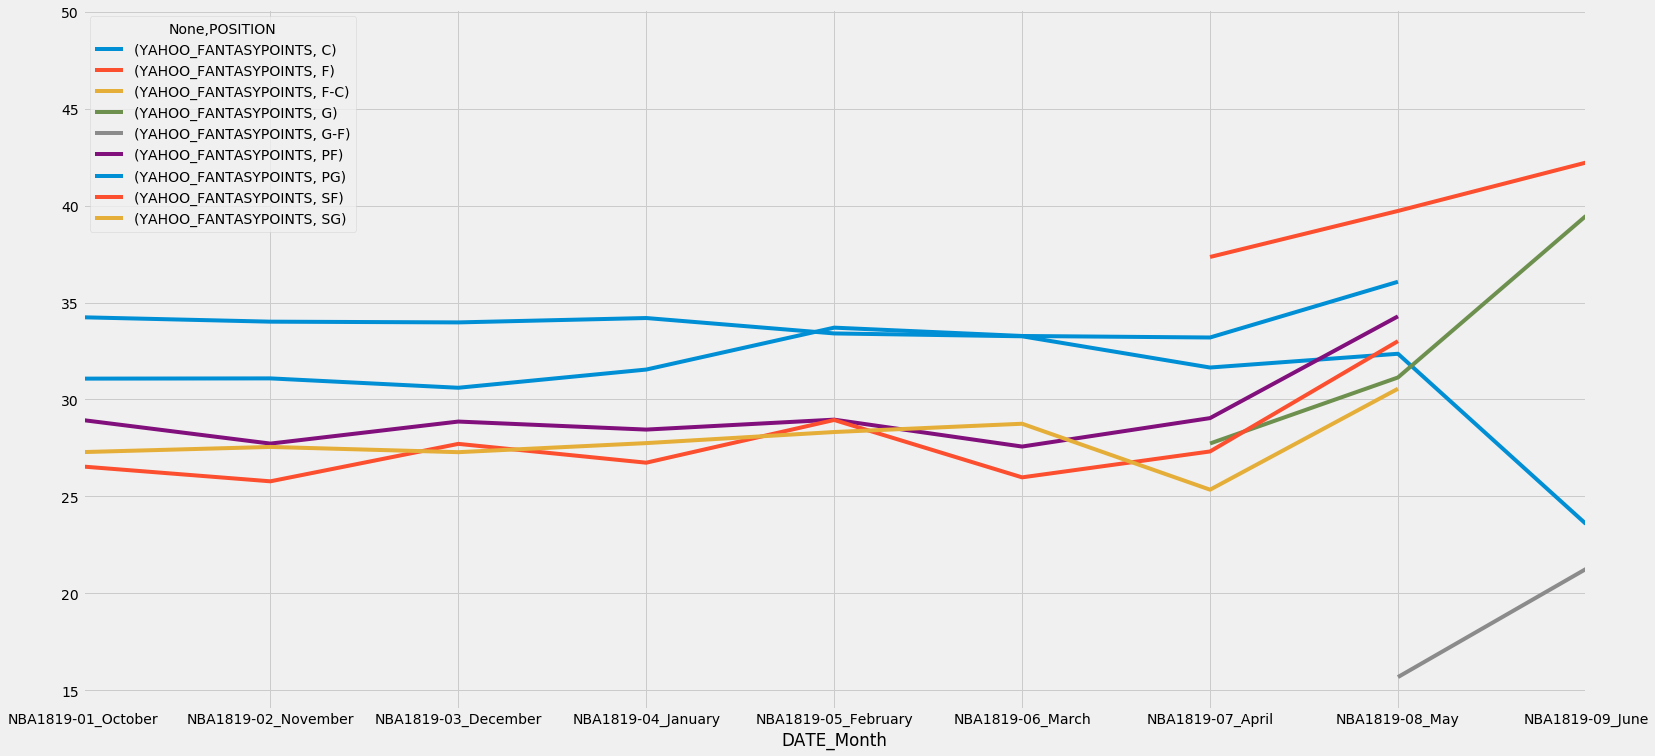

In [17]:
test_df[starter_mask].pivot_table(index=['DATE_Month'],
                                  values=['YAHOO_FANTASYPOINTS'], 
                                  columns=['POSITION'], 
                                  aggfunc='mean').plot(figsize=(24, 12), kind='line')

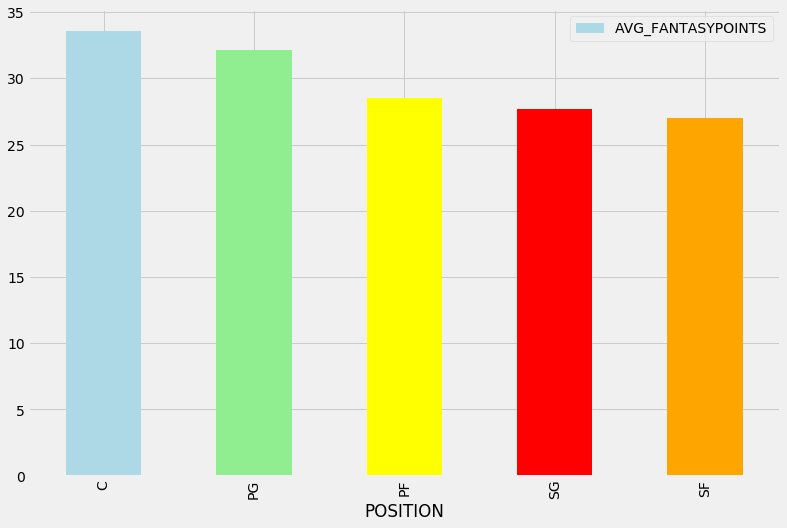

In [28]:
avg_position_value = pd.pivot_table(test_df[starter_mask], index=['POSITION'],
                                                           values=['YAHOO_FANTASYPOINTS', 'GAME-ID'], 
                                                           aggfunc={'YAHOO_FANTASYPOINTS':'mean',
                                                                    'GAME-ID':'count'}).sort_values(by='YAHOO_FANTASYPOINTS', ascending=False).reset_index()

# Rename the pivot table columns for clarity
avg_position_value.rename(columns={'GAME-ID':'GAMES_PLAYED',
                                   'YAHOO_FANTASYPOINTS':'AVG_FANTASYPOINTS'}, inplace=True)

# Create a filter for games played
game_filter = (avg_position_value['GAMES_PLAYED'] > 100)
avg_position_value[game_filter].reset_index(drop=True).plot(x='POSITION', y='AVG_FANTASYPOINTS', kind='bar', figsize=(12,8), color=['lightblue', 'lightgreen', 'yellow', 'red', 'orange'])

In [15]:
player_trends = pd.pivot_table(test_df[starter_mask], index=['OWNTEAM', 'POSITION', 'PLAYER'],
                                                      values=['YAHOO_FANTASYPOINTS'],
                                                      columns=['DATE_Month'],
                                                      aggfunc='mean')

player_trends

YAHOO_FANTASYPOINTS                      \
DATE_Month                            NBA1819-01_October NBA1819-02_November   
OWNTEAM    POSITION PLAYER                                                     
Atlanta    C        Alex Len                       24.17               19.53   
                    Dewayne Dedmon                   NaN               20.80   
           PF       John Collins                     NaN               28.13   
                    Omari Spellman                   NaN               21.06   
                    Vince Carter                   15.60                7.40   
...                                                  ...                 ...   
Washington SG       Austin Rivers                    NaN                 NaN   
                    Bradley Beal                   36.86               37.81   
                    Chasson Randle                   NaN                 NaN   
                    Tomas Satoransky                 NaN                 NaN   
                    Troy Brown Jr.                   NaN                 NaN   

                                                                             \
DATE_Month                           NBA1819-03_December NBA1819-04_January   
OWNTEAM    POSITION PLAYER                                                    
Atlanta    C        Alex Len                       33.20                NaN   
                    Dewayne Dedmon                 31.21              26.75   
           PF       John Collins                   39.42              34.41   
                    Omari Spellman                   NaN              26.40   
                    Vince Carter                     NaN                NaN   
...                                                  ...                ...   
Washington SG       Austin Rivers                  24.25                NaN   
                    Bradley Beal                   44.13              47.40   
                    Chasson Randle                   NaN                NaN   
                    Tomas Satoransky               35.30                NaN   
                    Troy Brown Jr.                   NaN                NaN   

                                                                           \
DATE_Month                           NBA1819-05_February NBA1819-06_March   
OWNTEAM    POSITION PLAYER                                                  
Atlanta    C        Alex Len                         NaN            26.97   
                    Dewayne Dedmon                 27.88            31.65   
           PF       John Collins                   32.43            38.24   
                    Omari Spellman                   NaN            17.00   
                    Vince Carter                     NaN              NaN   
...                                                  ...              ...   
Washington SG       Austin Rivers                    NaN              NaN   
                    Bradley Beal                   49.94            47.38   
                    Chasson Randle                  7.05              NaN   
                    Tomas Satoransky                 NaN              NaN   
                    Troy Brown Jr.                   NaN            20.77   

                                                                      \
DATE_Month                           NBA1819-07_April NBA1819-08_May   
OWNTEAM    POSITION PLAYER                                             
Atlanta    C        Alex Len                    34.60            NaN   
                    Dewayne Dedmon                NaN            NaN   
           PF       John Collins                43.27            NaN   
                    Omari Spellman                NaN            NaN   
                    Vince Carter                  NaN            NaN   
...                                               ...            ...   
Washington SG       Austin Rivers                 NaN            NaN   
          

In [16]:
top_players = pd.pivot_table(df, index=['PLAYER'],
                                 values=['YAHOO_FANTASYPOINTS', 'GAME-ID'], 
                                 aggfunc={'YAHOO_FANTASYPOINTS':'mean',
                                          'GAME-ID':'count'}).sort_values(by='YAHOO_FANTASYPOINTS', ascending=False).head(25).reset_index()

# Rename the pivot table columns for clarity
top_players.rename(columns={'GAME-ID':'GAMES_PLAYED',
                            'YAHOO_FANTASYPOINTS':'AVG_FANTASYPOINTS'}, inplace=True)
top_players

,PLAYER,GAMES_PLAYED,AVG_FANTASYPOINTS
0,James Harden,89,58.18
1,Anthony Davis,56,56.11
2,Giannis Antetokounmpo,87,55.77
3,Russell Westbrook,78,54.72
4,Joel Embiid,75,52.13
5,LeBron James,55,52.04
6,Paul George,82,49.04
7,Karl-Anthony Towns,77,48.69
8,Nikola Jokic,94,48.42
9,Kawhi Leonard,84,46.69
